In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import os
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

%pylab inline

import json
#s = json.load( open(os.getenv ('PUIDATA')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [3]:
if os.getenv ('PUIDATA') is None:
    os.environ['PUIDATA'] = '/Users/mac/Desktop/CUSP/PUI/PUIdata'

In [4]:
mta = np.load(os.getenv('PUIDATA') + '/'+ "MTA_Fare.npy")

In [5]:
mta.shape

(600, 23, 194)

In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [7]:
mta = mta.astype('float')
mta[mta == (-1)] = 'nan'

In [8]:
date = pd.date_range(start = '05/21/2010', end = '01/31/2014',freq = '7D')

In [9]:
date

DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23',
               ...
               '2013-11-29', '2013-12-06', '2013-12-13', '2013-12-20',
               '2013-12-27', '2014-01-03', '2014-01-10', '2014-01-17',
               '2014-01-24', '2014-01-31'],
              dtype='datetime64[ns]', length=194, freq='7D')

In [10]:
mta1 = mta.reshape(13800,194)

In [11]:
mta_pd1 = pd.DataFrame(mta1, index = None, columns = date)

In [12]:
mta_pd1 = mta_pd1.dropna(axis = 0, how = 'all')

In [13]:
mta_pd1 = mta_pd1.transpose()

[<matplotlib.text.Text at 0x17ca230f0>, <matplotlib.text.Text at 0x17c79a358>]

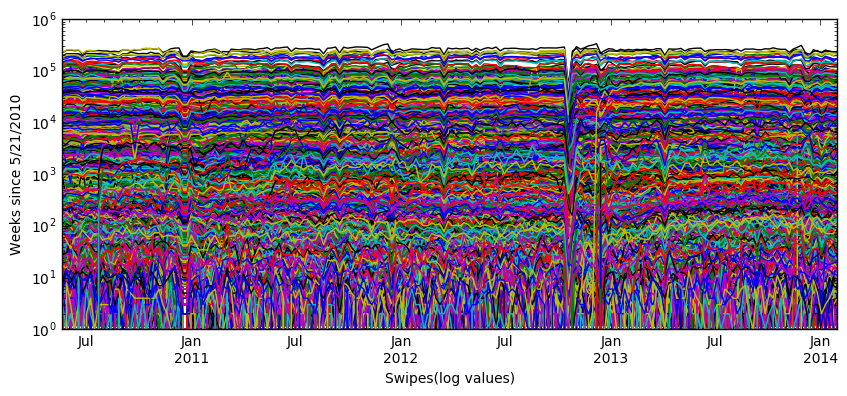

In [124]:
ax = mta_pd1.plot(logy = True, legend = None, figsize = (10,4))
ax.set(xlabel='Swipes(log values)', ylabel='Weeks since 5/21/2010')

### Figure 1: Swipes (log) per card type for each station per week

In [14]:
mta_sum1 = np.nansum(mta,axis = 1)
mta_mean1 = np.nanmean(mta_sum1, axis = 0)

In [15]:
mta_mean1.shape

(194,)

In [16]:
mta_pd1['mean'] = mta_mean1

In [17]:
mta_pd1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,12664,12665,12666,12667,12668,12669,12670,12671,12672,mean
2010-05-21,56961.0,1732.0,203.0,883.0,358.0,17654.0,32369.0,59.0,6733.0,1835.0,...,0.0,0.0,0.0,0.0,202.0,0.0,0.0,0.0,NaN,44533.778333
2010-05-28,64703.0,2083.0,276.0,958.0,529.0,20249.0,42599.0,60.0,5487.0,2320.0,...,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,NaN,48776.618333
2010-06-04,68002.0,2107.0,245.0,976.0,422.0,20325.0,41423.0,67.0,6237.0,2521.0,...,0.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0,NaN,49335.315000


[<matplotlib.text.Text at 0x10e411cf8>, <matplotlib.text.Text at 0x10e3e4748>]

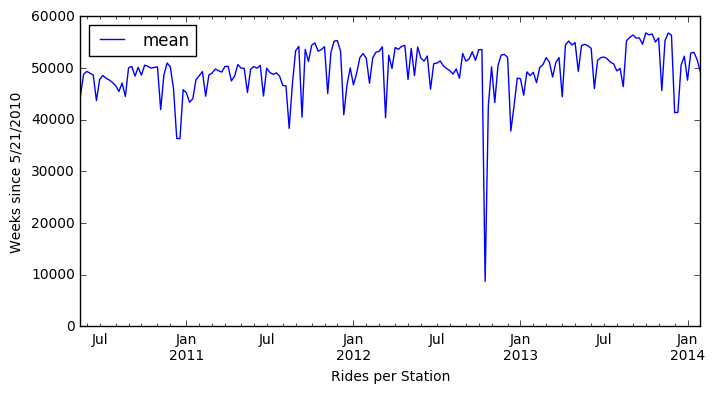

In [18]:
ax = mta_pd1.reset_index().plot(x = 'index', y = 'mean', figsize = (8,4))
ax.set(xlabel='Rides per Station', ylabel='Weeks since 5/21/2010')

### Figure 2: Average Swipes per station per week

In [19]:
thresholds = [mta_pd1['mean'].mean() + 3 * mta_pd1['mean'].std(), 
              mta_pd1['mean'].mean() - 3 * mta_pd1['mean'].std()]

In [20]:
thresholds

[64593.987625626447, 34677.178611486954]

In [21]:
mta_pd1.loc[(mta_pd1['mean'] < thresholds[1])]

,0,1,2,3,4,5,6,7,8,9,...,12664,12665,12666,12667,12668,12669,12670,12671,12672,mean
2012-10-19,11409.0,255.0,40.0,123.0,2.0,5083.0,3151.0,0.0,0.0,0.0,...,0.0,0.0,0.0,481.0,64.0,0.0,0.0,0.0,0.0,8697.81


### The week when there was a significant drop in the number of rides in New York started on October 19th, 2012. The Sandy hurricance also happened during the same week, explaining the significant drop that we observe.

### Task 2

In [22]:
mta_sum2 = np.nansum(mta,axis = 0)

In [23]:
mta_sum2[22].shape

(194,)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


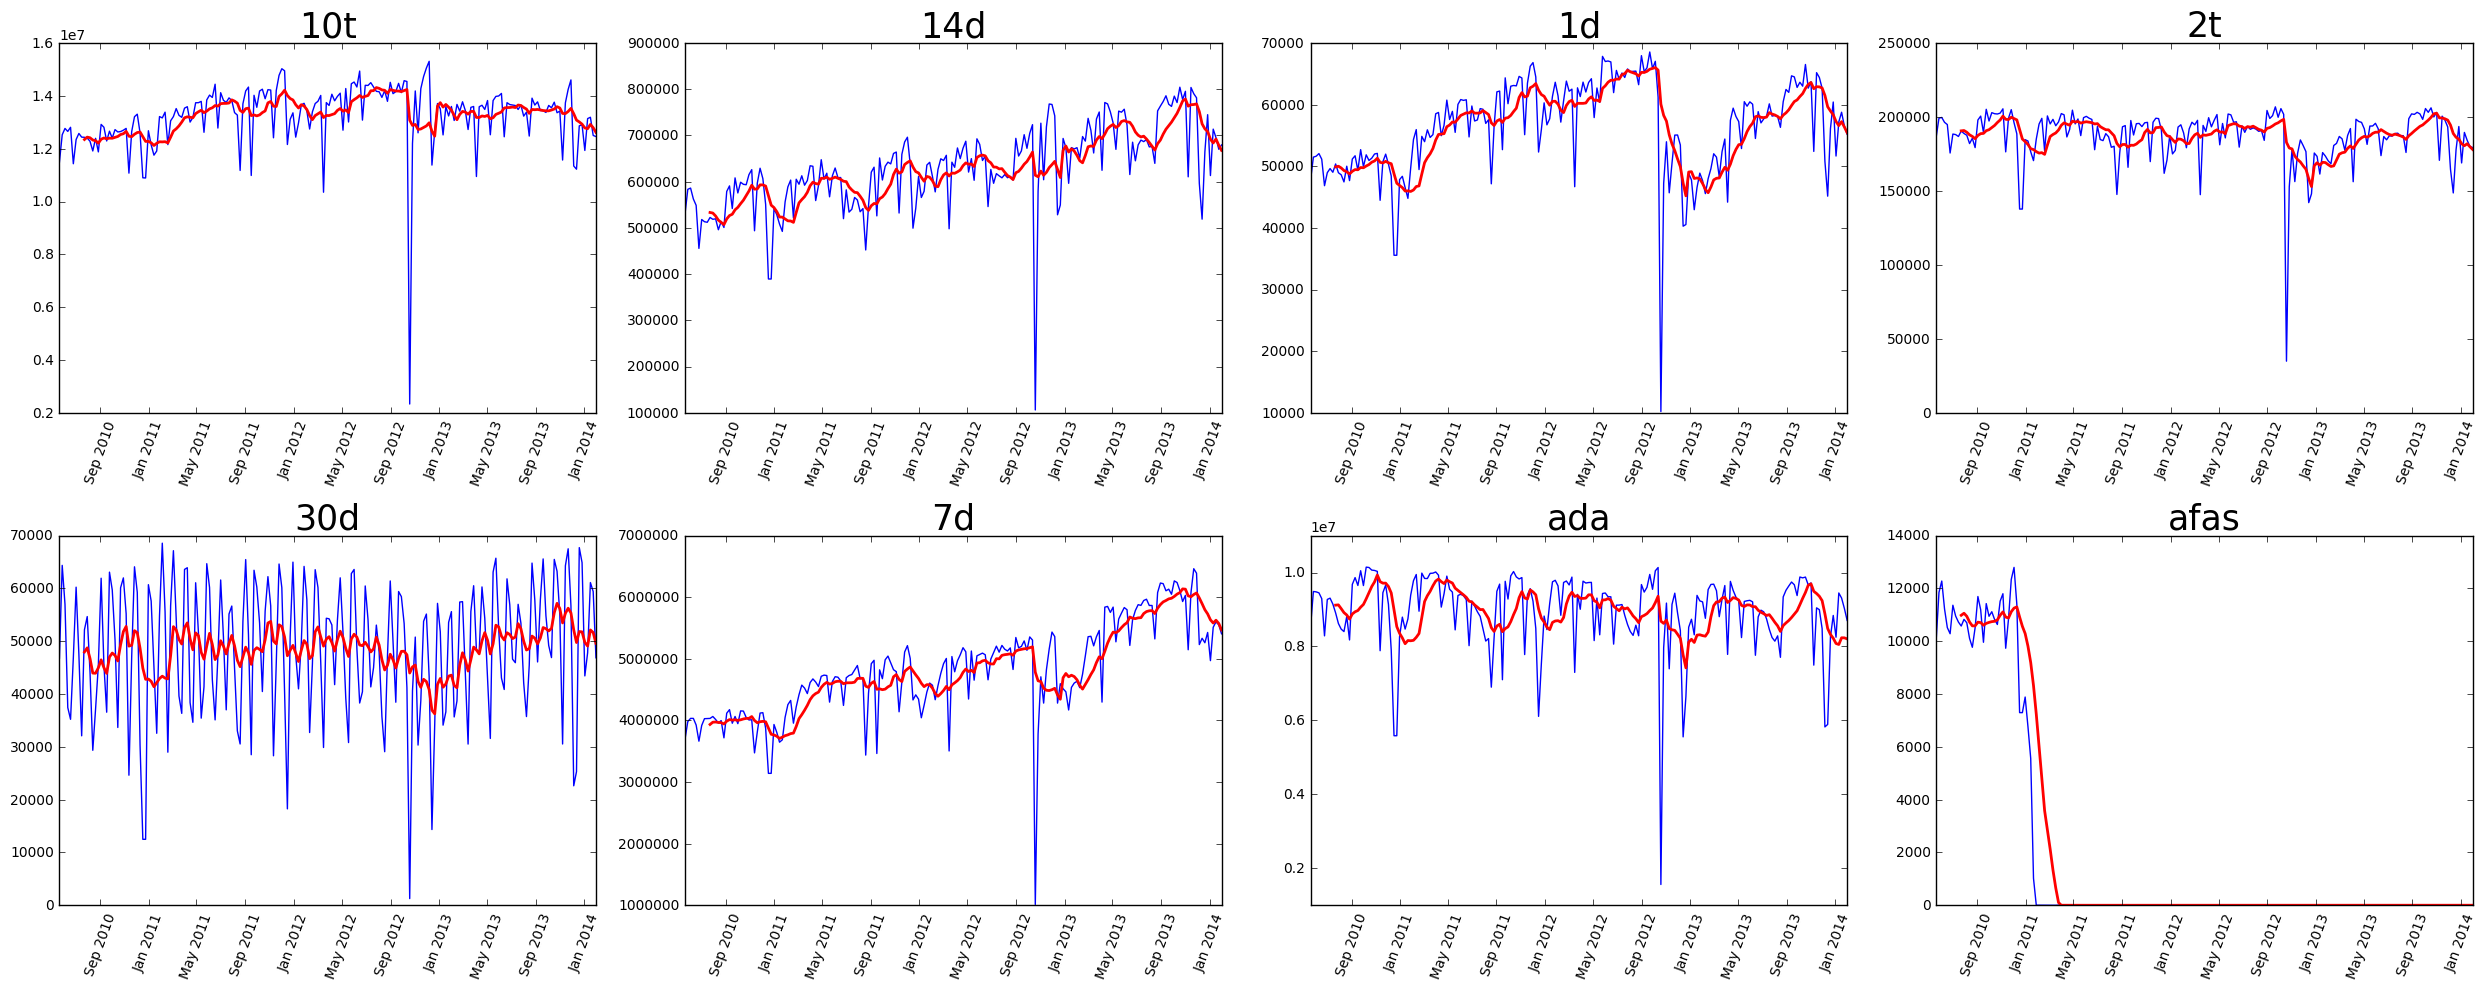

In [25]:
fig1 = pl.figure(figsize = (25, 10))
ax1=[0] * 8

ax1[0] = fig1.add_subplot(241)
ax1[1] = fig1.add_subplot(242)
ax1[2] = fig1.add_subplot(243)
ax1[3] = fig1.add_subplot(244)
ax1[4] = fig1.add_subplot(245)
ax1[5] = fig1.add_subplot(246)
ax1[6] = fig1.add_subplot(247)
ax1[7] = fig1.add_subplot(248)

for i, a in enumerate(range(8)):
    ax1[i].plot(date, mta_sum2[a], '-')  
    ax1[i].plot(date, pd.rolling_mean(mta_sum2[a], 10),'r', lw = 2)
    ax1[i].set_title(ridetype[a], fontsize = 25)
    pl.setp( ax1[i].xaxis.get_majorticklabels(), rotation=70 )

fig1.tight_layout()

### Figure 3: Number of rides per week since 05/21/2010 with rolling mean (window = 10 weeks) for each ridership type

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


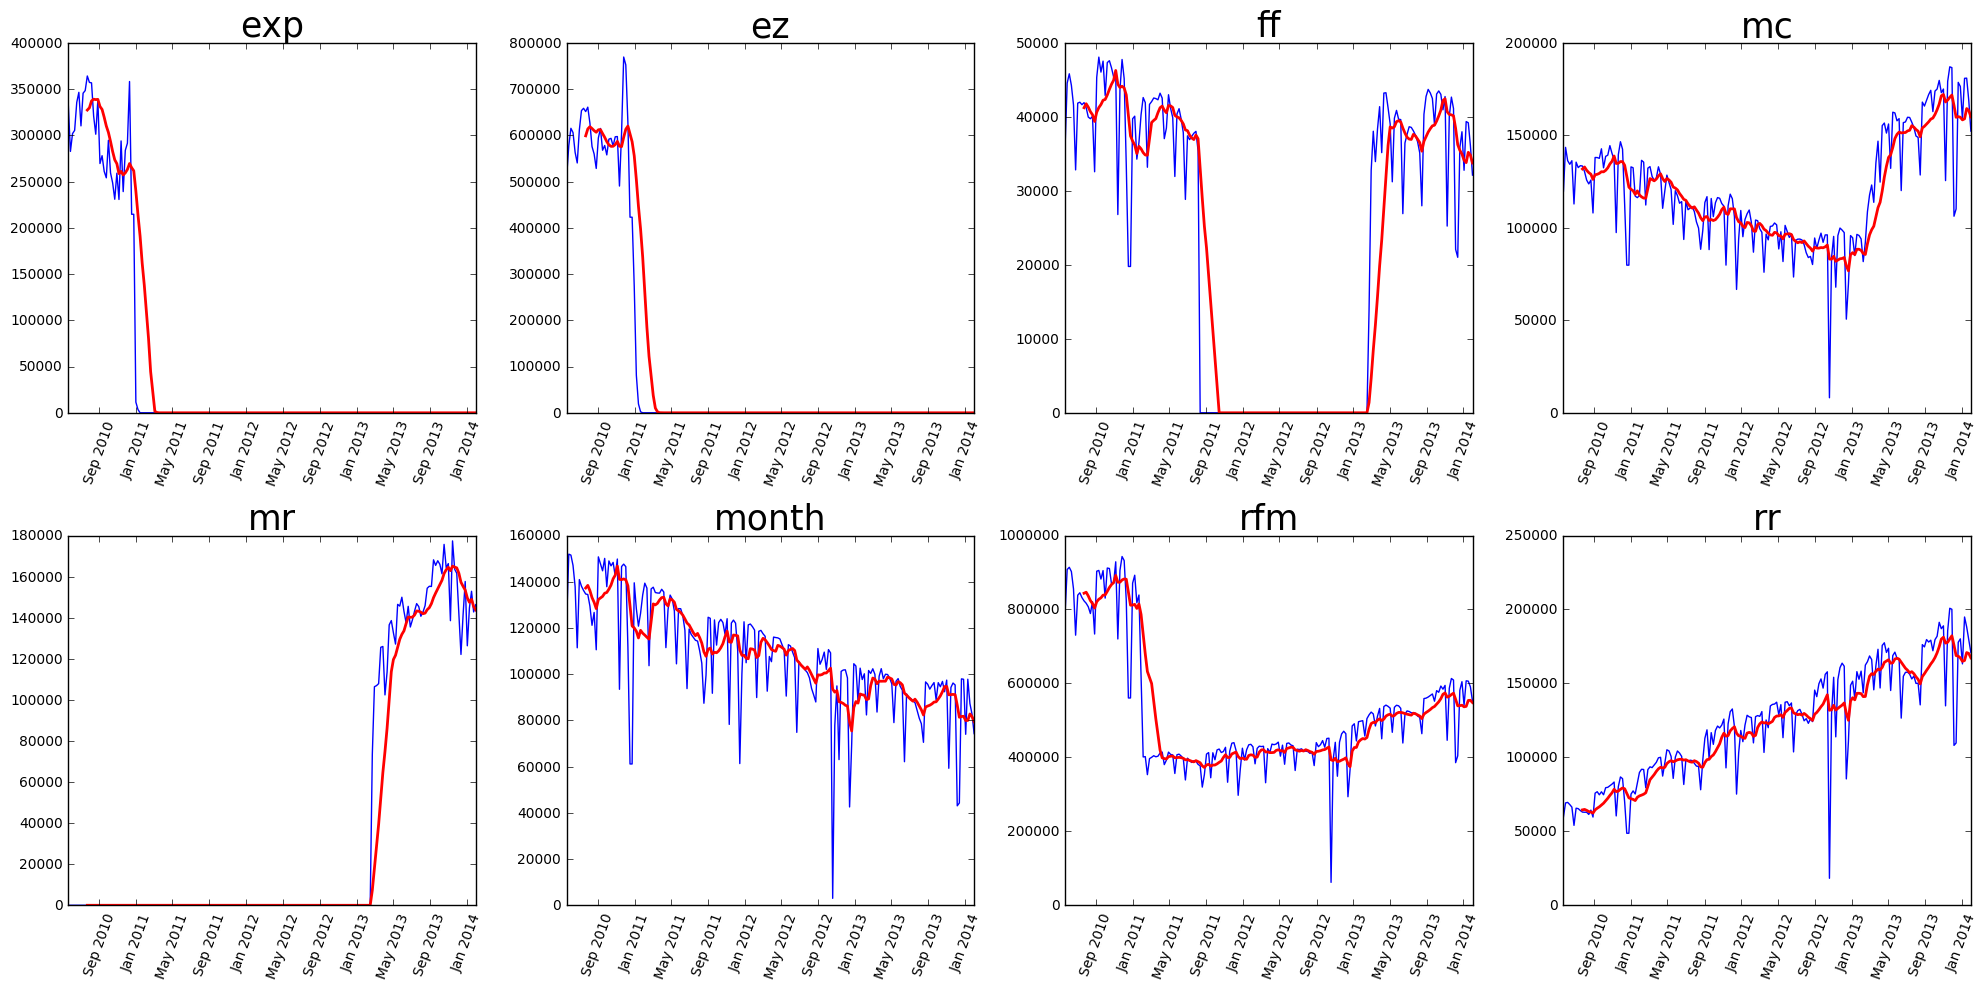

In [26]:
fig2 = pl.figure(figsize = (20, 10))
ax2=[0] * 8

ax2[0] = fig2.add_subplot(241)
ax2[1] = fig2.add_subplot(242)
ax2[2] = fig2.add_subplot(243)
ax2[3] = fig2.add_subplot(244)
ax2[4] = fig2.add_subplot(245)
ax2[5] = fig2.add_subplot(246)
ax2[6] = fig2.add_subplot(247)
ax2[7] = fig2.add_subplot(248)

for i, a in enumerate(range(8,16)):
    ax2[i].plot(date, mta_sum2[a], '-')
    ax2[i].plot(date, pd.rolling_mean(mta_sum2[a], 10),'r', lw = 2)
    ax2[i].set_title(ridetype[a], fontsize = 25)
    pl.setp( ax2[i].xaxis.get_majorticklabels(), rotation=70 )

fig2.tight_layout()

### Figure 4: Number of rides per week since 05/21/2010 with rolling mean (window = 10 weeks) for each ridership type

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


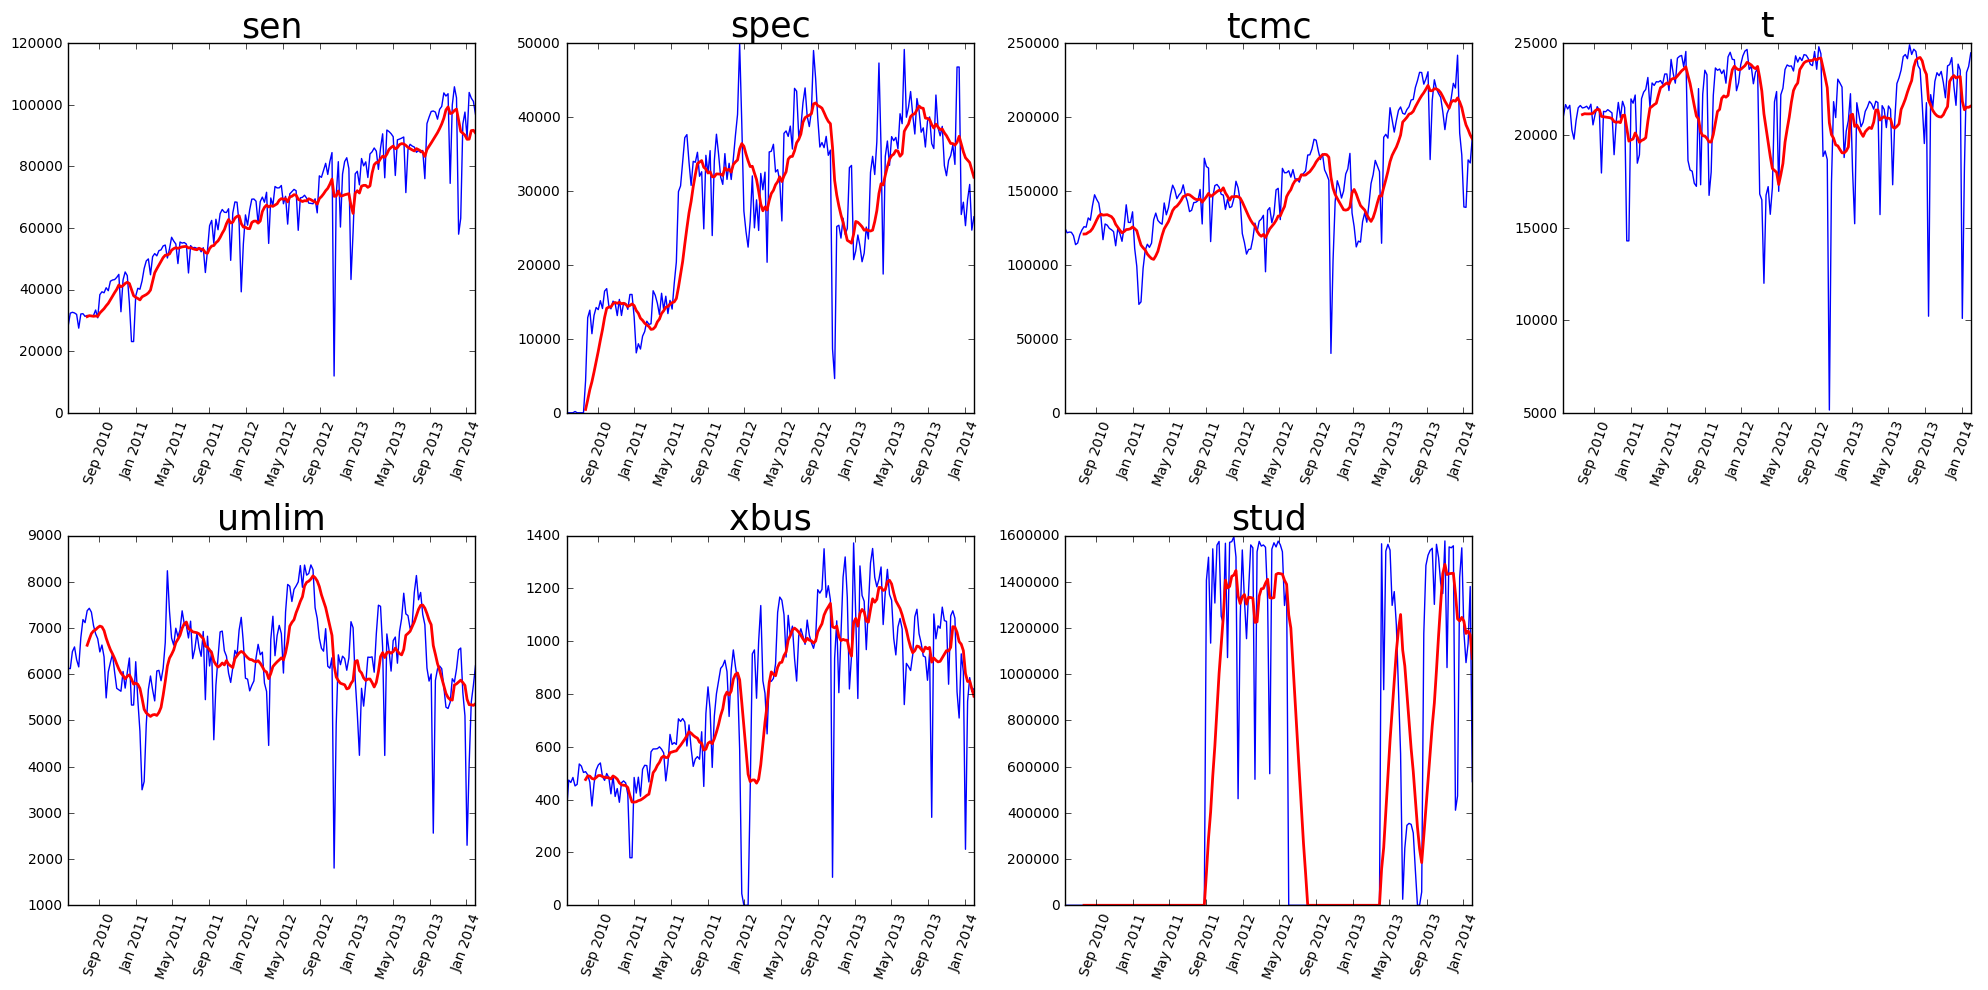

In [27]:
fig3 = pl.figure(figsize = (20, 10))
ax3=[0] * 8

ax3[0] = fig3.add_subplot(241)
ax3[1] = fig3.add_subplot(242)
ax3[2] = fig3.add_subplot(243)
ax3[3] = fig3.add_subplot(244)
ax3[4] = fig3.add_subplot(245)
ax3[5] = fig3.add_subplot(246)
ax3[6] = fig3.add_subplot(247)

for i, a in enumerate(range(16,23)):
    ax3[i].plot(date, mta_sum2[a], '-')
    ax3[i].plot(date, pd.rolling_mean(mta_sum2[a], 10),'r', lw = 2)
    ax3[i].set_title(ridetype[a], fontsize = 25)
    pl.setp( ax3[i].xaxis.get_majorticklabels(), rotation=70 )

fig3.tight_layout()

### Figure 5: Number of rides per week since 05/21/2010 with rolling mean (window = 10 weeks) for each ridership type

Based on the graphs, the ridership types are categorized into the following categories:

- Downward trend: month
- Stationary: 10t, 14d, 1d, 2t, 30d,ada, ff, mc, rfm, t, umlim, stud
- Upward trend: 7d, rr, spec, tcmc, sen, xbus. 

The series afas, exp, ez, mr cannot be identified because of missing data.

### In the following part, I group the series into three parts by evaluateing the ratio of the sum of rides in first 10 weeks over that of last 10 weeks

In [91]:
ratio_usage = []
for i in range(23):
    r = mta_sum2[i][:10].sum()/mta_sum2[i][-10:].sum()
    ratio_usage.append(r)
#ratio_usage

In [103]:
ratio_pd = pd.DataFrame(ratio_usage, columns = ['ratio'])
ratio_pd['ride_type'] = ridetype
ratio_pd.head(3)

,ratio,ride_type
0,0.978667,10t
1,0.798681,14d
2,0.899810,1d


In [146]:
ratio_pd = ratio_pd.sort(['ratio'], ascending= [True])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


### I use 0.7 and 1.6 as the the threshold values for grouping. The results are quite similar to the results I got by looking at the graph except for the ones I couldn't identify because of missing data. The only difference is the 7d rides which I categoried as upward trend based on the graph but stationary based on my threshold value for the ratio of usage. The reason is that I only compare the first 10 weeks and the last 10 weeks and didn't consider the missing data during the in-between period.

In [149]:
stationary = ratio_pd[(ratio_pd['ratio'] >0.7) & (ratio_pd['ratio'] < 1.6)]
downward = ratio_pd[ratio_pd['ratio'] >= 1.6]
upward = ratio_pd[ratio_pd['ratio'] <= 0.7]

In [150]:
stationary

,ratio,ride_type
5,0.719555,7d
1,0.798681,14d
11,0.824035,mc
2,0.899810,1d
4,0.967317,30d
0,0.978667,10t
19,0.978867,t
3,1.070889,2t
6,1.111307,ada
10,1.221296,ff


In [151]:
downward

,ratio,ride_type
13,1.727944,month
7,4774.478261,afas
8,93571.342857,exp
9,665798.555556,ez


In [152]:
upward

,ratio,ride_type
22,0.000000,stud
12,0.000040,mr
17,0.014249,spec
16,0.343714,sen
15,0.385660,rr
21,0.601566,xbus
18,0.652626,tcmc


### Task 3

In [29]:
mta_sum3 = np.nansum(mta_sum1, axis = 1)

In [30]:
mta_sum3.shape

(600,)

In [31]:
1/52

0.019230769230769232

In [33]:
N = 194
np.fft.rfftfreq(N, 1.0)

array([ 0.        ,  0.00515464,  0.01030928,  0.01546392,  0.02061856,
        0.0257732 ,  0.03092784,  0.03608247,  0.04123711,  0.04639175,
        0.05154639,  0.05670103,  0.06185567,  0.06701031,  0.07216495,
        0.07731959,  0.08247423,  0.08762887,  0.09278351,  0.09793814,
        0.10309278,  0.10824742,  0.11340206,  0.1185567 ,  0.12371134,
        0.12886598,  0.13402062,  0.13917526,  0.1443299 ,  0.14948454,
        0.15463918,  0.15979381,  0.16494845,  0.17010309,  0.17525773,
        0.18041237,  0.18556701,  0.19072165,  0.19587629,  0.20103093,
        0.20618557,  0.21134021,  0.21649485,  0.22164948,  0.22680412,
        0.23195876,  0.2371134 ,  0.24226804,  0.24742268,  0.25257732,
        0.25773196,  0.2628866 ,  0.26804124,  0.27319588,  0.27835052,
        0.28350515,  0.28865979,  0.29381443,  0.29896907,  0.30412371,
        0.30927835,  0.31443299,  0.31958763,  0.32474227,  0.32989691,
        0.33505155,  0.34020619,  0.34536082,  0.35051546,  0.35

### Since we are looking at annual periodicity, the frequecy rate will be the rides every 52 weeks. The x value of 52 weeks frequency on the FFT is: 1/52, so the most relevant frequency to 52 weeks on the FFT array will 5th observation, which yields the value of 0.02  closest to 1/52

In the following part, I created a loop that keeps the power value at the frequency rate 1/52 for each of 600 stations

In [34]:
power = []
for i in range(600):
    f = np.abs(np.fft.rfft(mta_sum1[i]))[5]
    power.append(f)

### I pick the 8 stations with highest power values

In [35]:
period_pd = pd.DataFrame(power, columns = ['power_52w'])
period_pd['station'] = range(1,601)
period_pd = period_pd.sort(['power_52w'], ascending= [False])
period_pd.head(8)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,power_52w,station
0,1.068934e+06,1
19,8.764827e+05,20
150,8.224296e+05,151
83,7.803684e+05,84
194,7.793882e+05,195
327,7.097790e+05,328
169,7.067085e+05,170
163,5.228849e+05,164


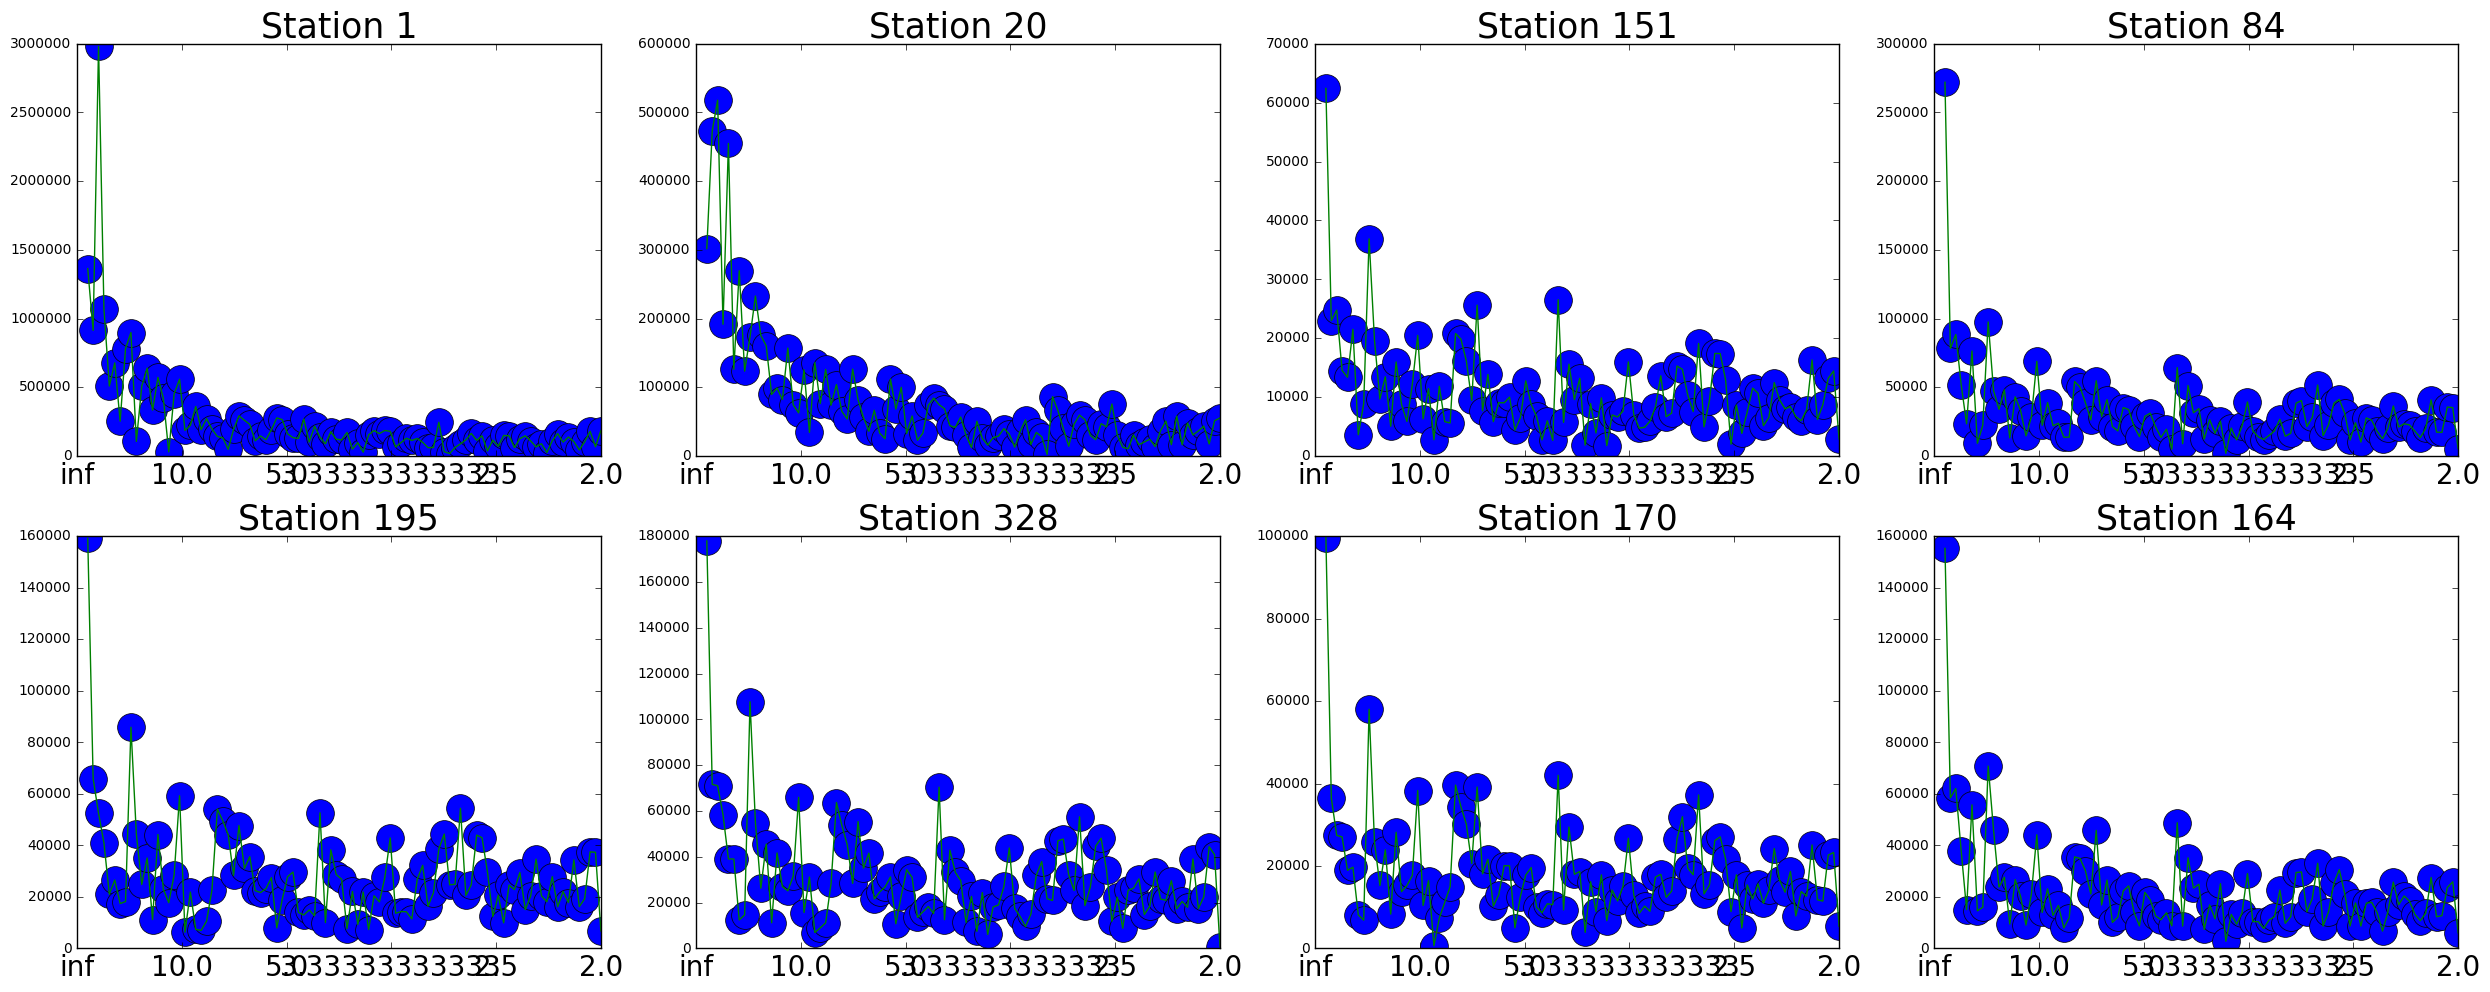

In [36]:
fig = pl.figure(figsize = (25, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)

for i, a in enumerate([0,19,150,83,194,327,169,163]):
    ax[i].plot(np.fft.rfftfreq(N, 1.0)[2:],np.abs(np.fft.rfft(mta_sum1[i]))[2:] , 'o', ms=20)
    ax[i].plot(np.fft.rfftfreq(N, 1.0)[2:],np.abs(np.fft.rfft(mta_sum1[i]))[2:] , '-')
    ax[i].set_title('Station %d'%(a+1), fontsize = 25)
    ax[i].set_xticklabels([ "%s"%(1/f) for f in ax[i].get_xticks()], fontsize=20)

fig.tight_layout()


### Graph 6: Power spectrum for each of the 8 stations with most prominent annual periodicity trend

### Because the power value may be biased due to the discrepancies in the rides number scales of different stations, which can be solved by a standardized power value. Hence, I plot the time series graphs for 8 stations to identify the annual periodicity better

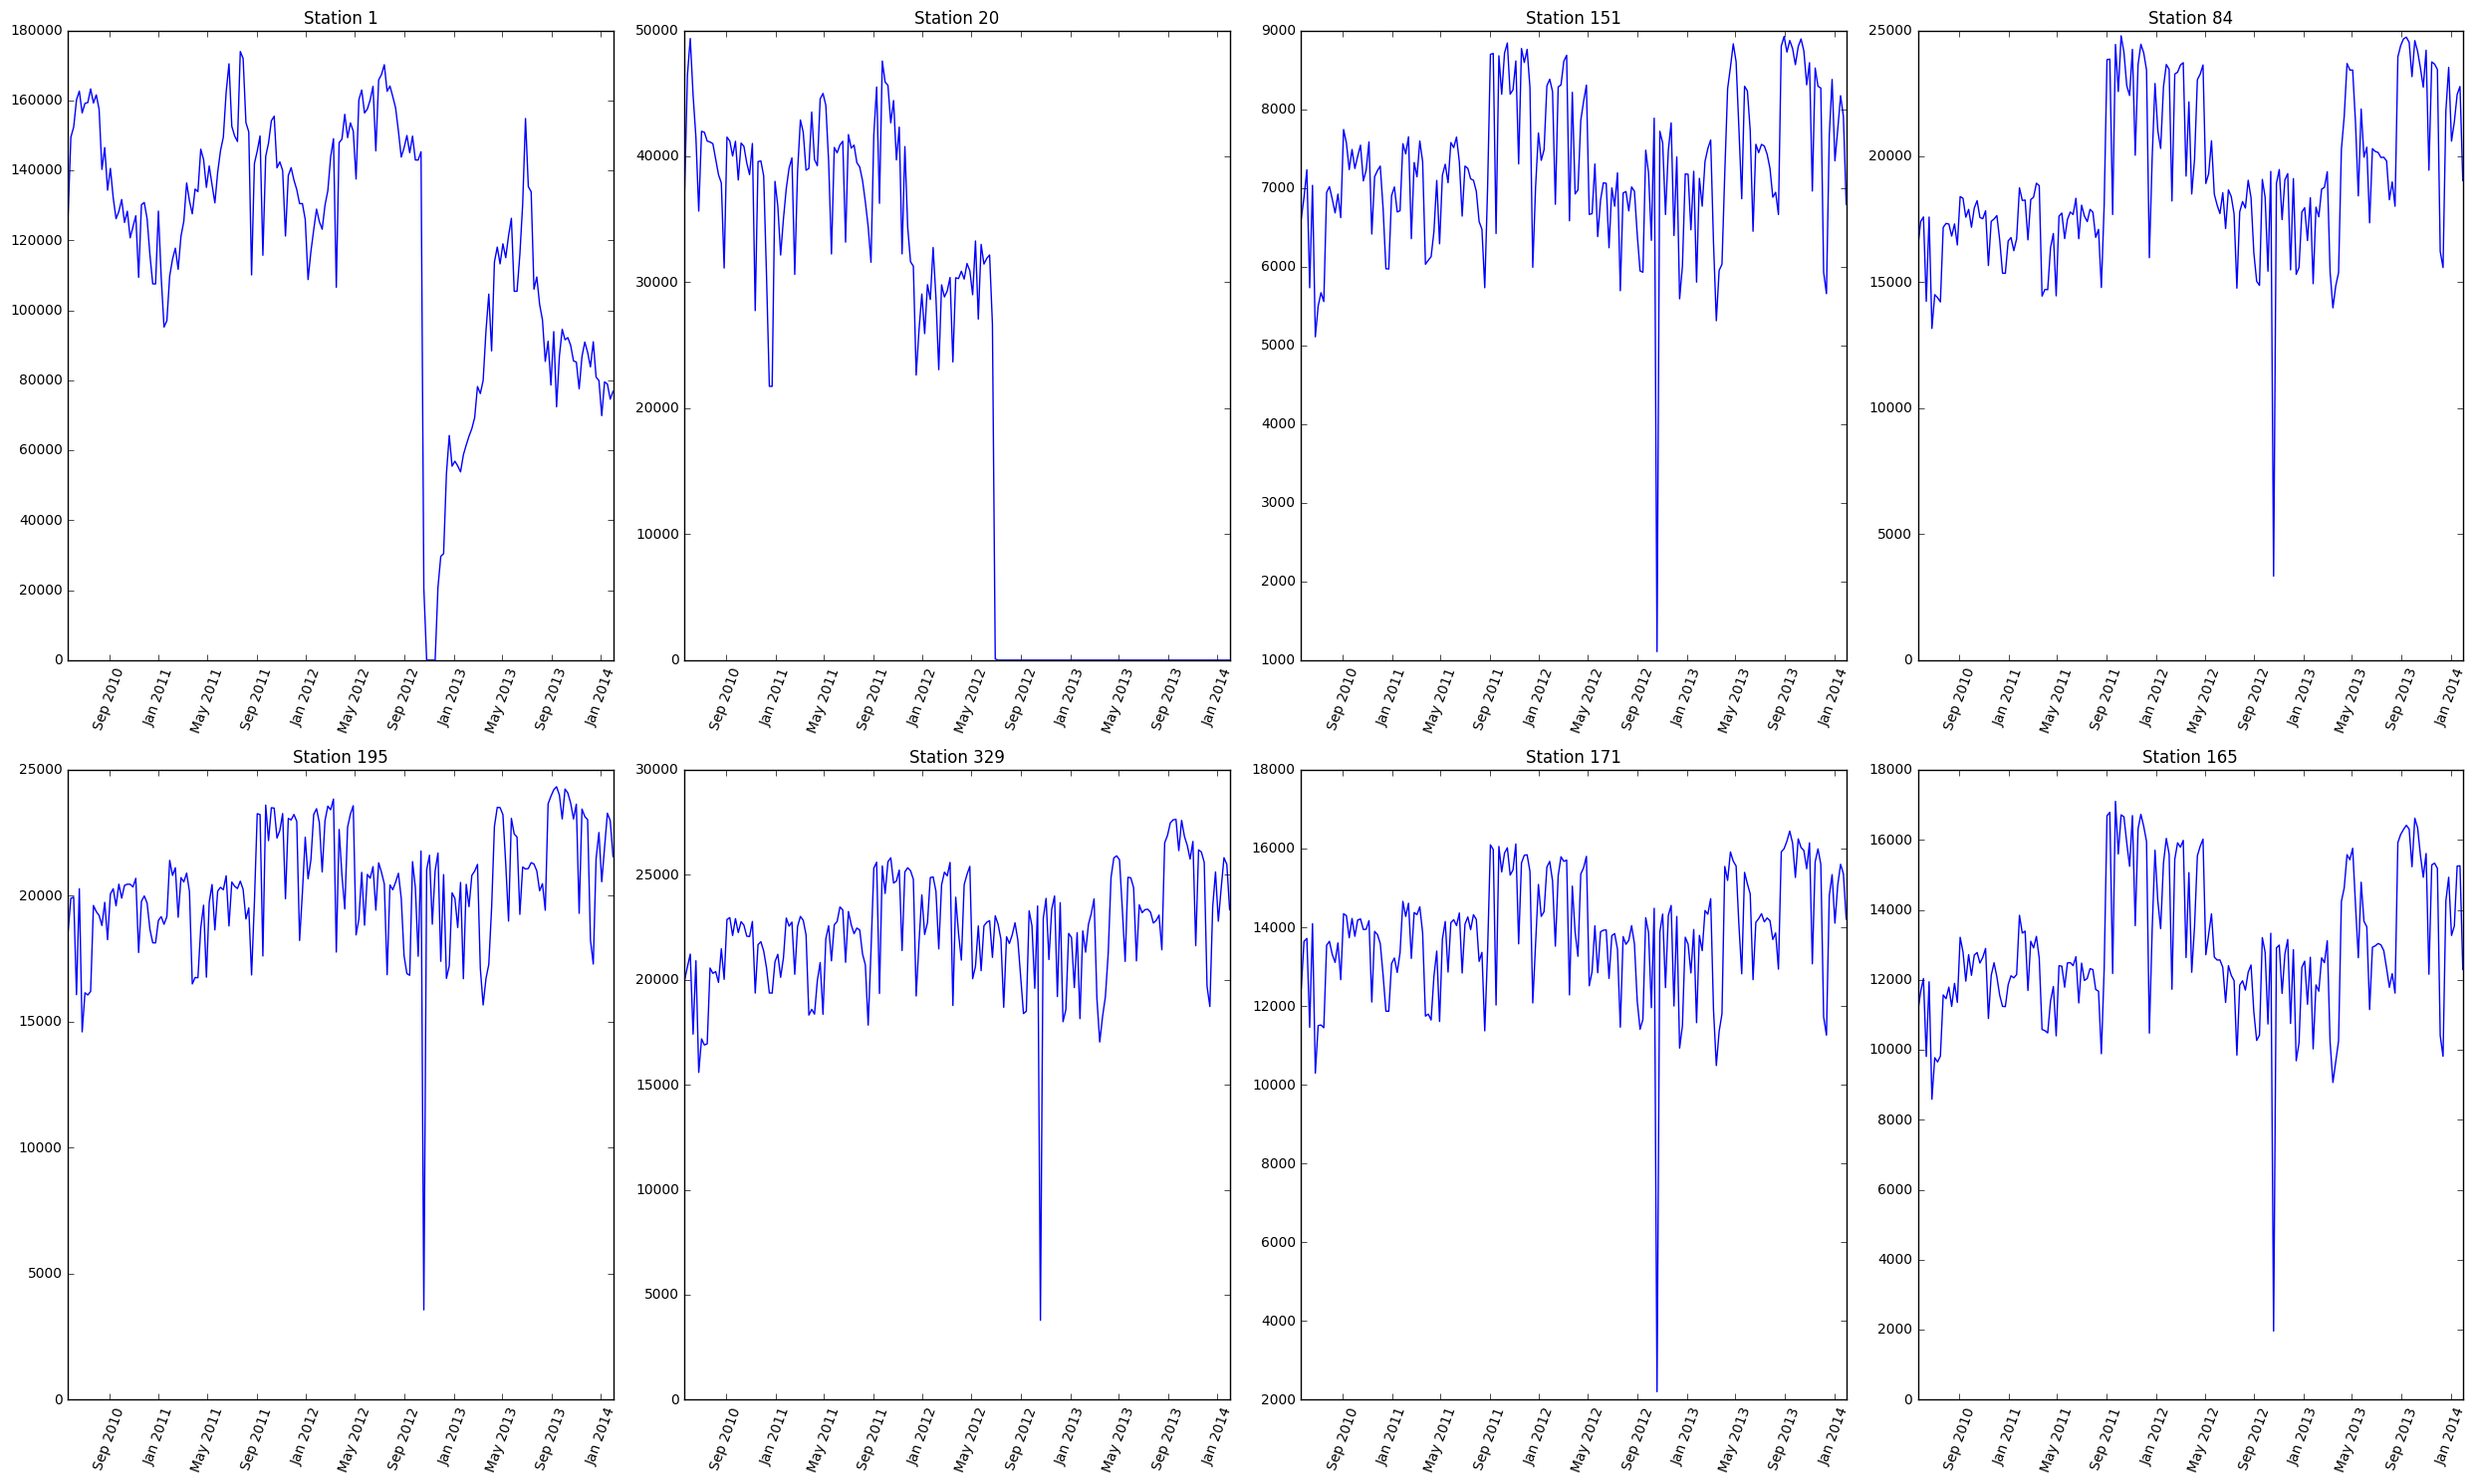

In [37]:
fig = pl.figure(figsize = (25, 15))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)

for i, a in enumerate([0,19,150,83, 194, 328, 170, 164]):
    ax[i].plot(date,mta_sum1[i])
    ax[i].set_title('Station %d'%(a+1))
    pl.setp( ax[i].xaxis.get_majorticklabels(), rotation=70 )

fig.tight_layout()


### Graph 7: Number of rides per week for each of the 8 stations with most prominent annual periodicity trend

### From the time series graphs, I pick station 1, 84, 171 and 165 as the 4 stations with most prominent periodcity trend

### Extra Credit

In [40]:
tots = mta.transpose(2,0,1).reshape(mta.shape[2], mta.shape[1]*mta.shape[0]).T

In [41]:
tots.shape

(13800, 194)

In [42]:
tots = tots[tots.std(1)>0]

In [43]:
tots.shape

(7660, 194)

In [44]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

In [45]:
vals.shape

(7660, 194)

I use the code from professor Stan in my Applied Data Science class for the elbow's definition

In [39]:
def elbow(data,K):
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    centroids = [k.cluster_centers_ for k in KM]

    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

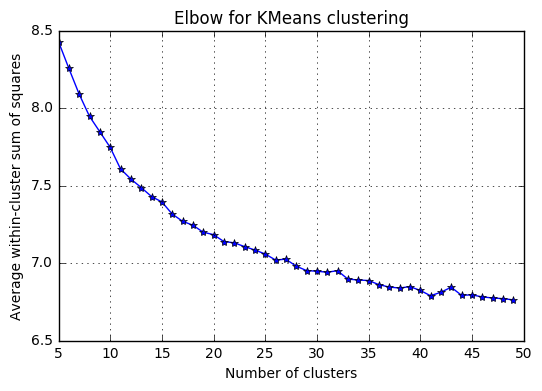

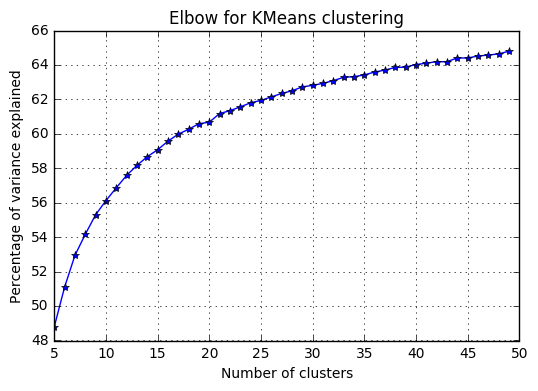

In [88]:
elbow(vals, range(5,50))

Based on the graph, I pick the number of clusters, 20

In [46]:
res = KMeans(random_state=324,n_clusters=20).fit(vals)

In [47]:
vals.shape

(7660, 194)

In [48]:
res.labels_.shape

(7660,)

In [49]:
# This list is the cluster label for each of the 13800 time series
res.labels_

array([12, 14,  3, ...,  2, 16,  5], dtype=int32)